In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np


In [2]:
#get the denoised image to be restored
denoised_image = cv2.imread("C:/Semester4/digital_image_processing/dip_project/images/restored_salt_pepper_image.jpg")

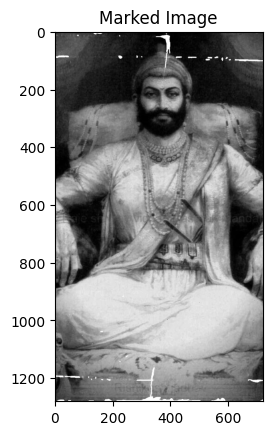

In [3]:
#get the marked image, which contains regions to be inpainted
marked_image = cv2.imread("C:/Semester4/digital_image_processing/dip_project/images/marked_image.jpg",0)
plt.imshow(marked_image, cmap='gray')
plt.title('Marked Image')
plt.show()

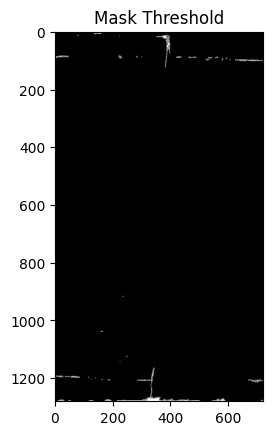

In [4]:

# Thresholding to create a binary mask of the marked image
# This identifies areas to be inpainted (255 = white) and areas to be preserved (0 = black)
ret , thresh = cv2.threshold(marked_image, 254, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')
plt.title('Mask Threshold')
plt.show()

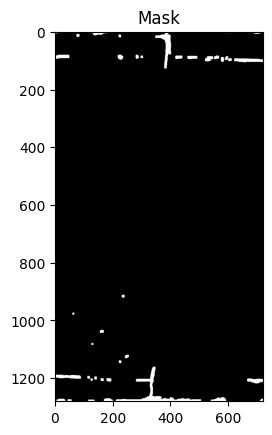

In [5]:
# Expand boundaries of the mask using dilation
# This helps to include additional pixels around the inpainting areas for smoother blending

kernel = np.ones((7, 7), np.uint8)

mask = cv2.dilate(thresh, kernel, iterations = 1)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.show()

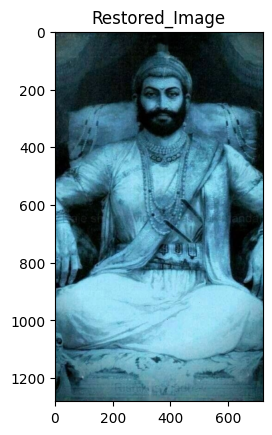

In [6]:
# Inpainting to restore the original image using the mask
# The inpainting algorithm fills in the marked regions using information from surrounding areas

restored_image = cv2.inpaint(denoised_image, mask, 3, cv2.INPAINT_TELEA)

# Display the restored image

plt.imshow(restored_image)
plt.title('Restored_Image')
plt.show()

In [7]:
# Save the restored image
cv2.imwrite("./images/Restored_denoised_image.jpg", restored_image)

True